In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import PIL
import cv2
import random

In [2]:
training_path = r"E:\Work\Data_Science\Projects\Custom_Object_Detection\data\training_demo\train"
training_image_path = os.path.join(training_path, 'images')
traing_label_path = os.path.join(training_path, 'labels')

In [3]:
image_name = random.choice(os.listdir(training_image_path))
label_name = image_name.split('.')[0]+'.txt'
print(image_name, label_name)

016.jpg 016.txt


## Read an image

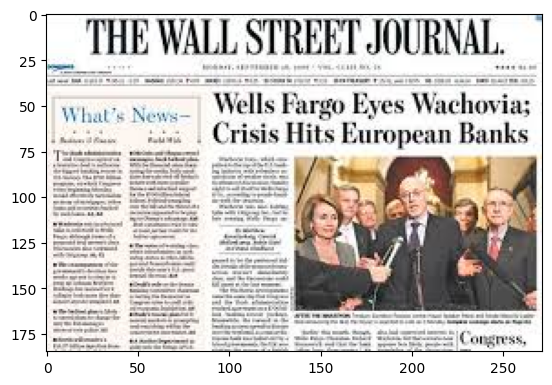

In [4]:
img = cv2.imread(os.path.join(training_image_path, image_name), cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
img.shape

(185, 272, 3)

In [7]:
H, W = img.shape[:2]
H, W

(185, 272)

## Read the annotations

In [8]:
with open(os.path.join(traing_label_path, label_name), 'r') as f:
    while f:
        line = f.readline()
        print(line)
        if line == "":
            break

3 0.509191 0.067568 0.886029 0.124324

0 0.654412 0.310811 0.654412 0.178378

0 0.161765 0.302703 0.286765 0.097297

1 0.744485 0.651351 0.496324 0.459459

2 0.165441 0.694595 0.308824 0.610811

2 0.409926 0.710811 0.165441 0.578378




### point to be noted here is that these are tipical YOLO annotations
### so for each line there are 5 values that represents:-
### object_class, normalized_center_x, normalized_center_y, normalized_width, normalized_height

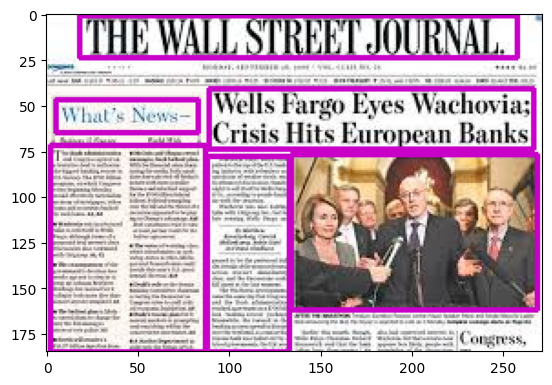

In [9]:
with open(os.path.join(traing_label_path, label_name), 'r') as f:
    while f:
        line = f.readline()
        if line == "":
            break
        label, x, y, w, h = line.split()
        label, x, y, w, h = (int(label), float(x), float(y), float(w), float(h))
        x1, y1, x2, y2 = (x-w/2, y-h/2, x+w/2, y+h/2)
        x1, y1, x2, y2 = (int(x1*W), int(y1*H), int(x2*W), int(y2*H))
        img = cv2.rectangle(img, (x1, y1), (x2,y2), (200,0,200), 2)
plt.imshow(img)